### Intro:

The purpose of this task is to build intuition about a simple, yet non-trivial causal discovery method. Given 2 variables, which is the cause and which is the effect? You may make the following simplifying assumptions:
- There is a direct, causal relationship between the two variables
- There are no unobserved confounders
- The relationship between the variables is non-linear
- The relationship is well-modeled by an additive noise function i.e. $y=f(x)+N$

Given a dataset with entries $(\mu, \phi)$, your task is to identify the likely causal direction. The data is provided as a $(500,2)$ array, available as a csv. There are two versions, each containing the same information; the only difference is which variable is in the first (i.e. [:,0]) position and which variable is sorted. This is for plotting convenience (i.e. plotting with a non-motonically increasing x causes your plot to jump all over the place) (but honestly, use the indexing and sorting convention that you find most convenient). 

$U_{\mu}\rightarrow \mu \rightarrow \phi \leftarrow U_{\phi}$   

OR   

$U_{\mu}\rightarrow \mu \leftarrow \phi \leftarrow U_{\phi}$

The task is inspiried by Bernhard Schölkopf's discussion in Part 2 of his MLSS Causal Discovery talk; refer to ~49:00 for guidance. For reference, he sketches the following:
1. Compute $f$ as non-linear regression of $X$ on $Y$
2. Compute residual: $N_{Y} := Y - f(X)$
3. Check whether $N_{Y}$ and $X$ are statistically dependent (what does this mean?)

#### Some additional notes:
- As Schölkopf mentions, overfitting may obscure the residual, which we are interested in. However, a model with very poor fit will exhibit dependence between $X$ and $N_{Y}$ (though it should be weaker than between $Y$ and $N_{X}$). Try to find a model fit that explains the data well while leaving sufficient residuals to explore.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# phi is phi_to_mu[:,0] and mu is phi_to_mu[:,1]
phi_to_mu = np.genfromtxt('phi_to_mu.csv', delimiter=',')

# mu is mu_to_phi[:,0] and phi is mu_to_phi[:,1]
mu_to_phi = np.genfromtxt('mu_to_phi.csv', delimiter=',')

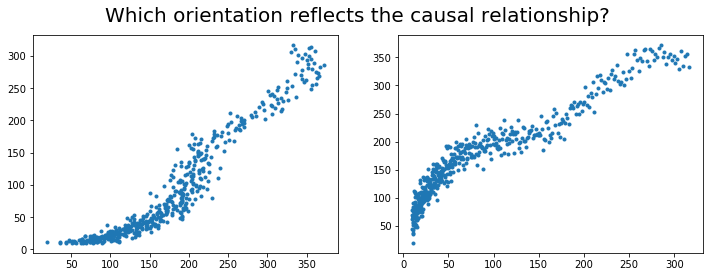

In [3]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(phi_to_mu[:,0], phi_to_mu[:,1], marker='.')
ax[1].scatter(mu_to_phi[:,0], mu_to_phi[:,1], marker='.')

fig.suptitle('Which orientation reflects the causal relationship?', fontsize=20)
plt.show()

## 1.1 Fit an appropriate model to the data in each direction
- What kind of model would be _inappropriate_ ?
- Do we need to make any assumptions about the noise distributions?

#### You should prepare a plot that illustrates your chosen models' fits to data

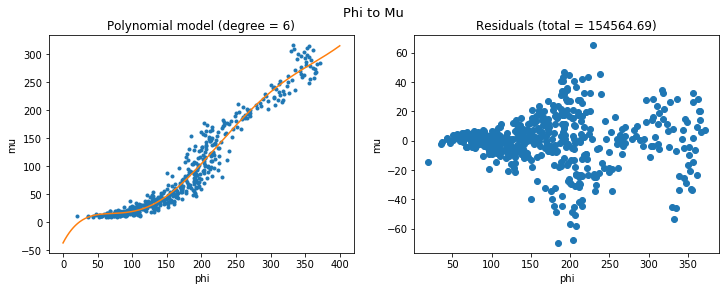

In [73]:
# phi to mu

fig, ax = plt.subplots(1,2,figsize=(12,4))

x = phi_to_mu[:,0]
y = phi_to_mu[:,1]

# polynomial fit
deg = 6
z = np.polyfit(x, y, deg, full=True)
p = np.poly1d(z[0]) # object given the parameters of the poly fit
xp = np.linspace(0, 400, 400)
ax[0].plot(x, y, '.', xp, p(xp), '-')
ax[0].set_title(f'Polynomial model (degree = {deg})')
ax[0].set_xlabel('phi')
ax[0].set_ylabel('mu')

# residuals
residuals = np.polyval(p, x) - y
# np.sum((np.polyval(parameters, x) - y)**2)
res = z[1][0]
ax[1].scatter(x, residuals)
ax[1].set_title(f'Residuals (total = {res:0.8})')
ax[1].set_xlabel('phi')
ax[1].set_ylabel('mu')

fig.suptitle('Phi to Mu', fontsize=13)
plt.show()

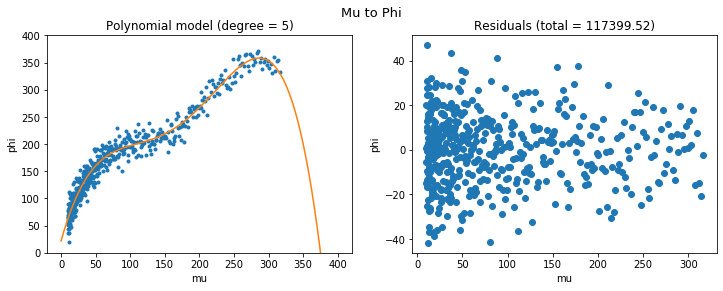

In [72]:
# mu to phi

fig, ax = plt.subplots(1,2,figsize=(12,4))

x = mu_to_phi[:,0]
y = mu_to_phi[:,1]

# polynomial fit
deg = 5
z = np.polyfit(x, y, deg, full=True)
p = np.poly1d(z[0]) # object given the parameters of the poly fit
xp = np.linspace(0, 400, 400)
ax[0].plot(x, y, '.', xp, p(xp), '-')
ax[0].set_title(f'Polynomial model (degree = {deg})')
ax[0].set_xlabel('mu')
ax[0].set_ylabel('phi')
ax[0].set_ylim(0, 400)

# residuals
residuals = np.polyval(p, x) - y
# np.sum((np.polyval(parameters, x) - y)**2)
res = z[1][0]
ax[1].scatter(x, residuals)
ax[1].set_title(f'Residuals (total = {res:0.8})')
ax[1].set_xlabel('mu')
ax[1].set_ylabel('phi')

fig.suptitle('Mu to Phi', fontsize=13)
plt.show()

## 1.2 Examine the respsective residuals 
- The residual statistical dependence should indicate the correct causal direction by inspection
- Schölkopf states: Prefer the causal direction that can be better fit with additive noise model

#### You should prepare a plot that compares residuals

In [ ]:
# see above

# What happens if you use a linear model?

--> neither model results in independent noise

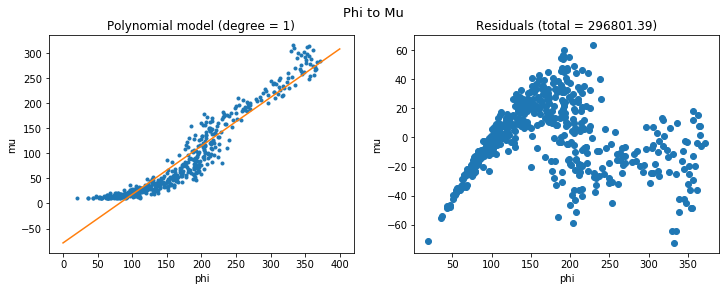

In [81]:
# phi to mu

fig, ax = plt.subplots(1,2,figsize=(12,4))

x = phi_to_mu[:,0]
y = phi_to_mu[:,1]

# polynomial fit
deg = 1
z = np.polyfit(x, y, deg, full=True)
p = np.poly1d(z[0]) # object given the parameters of the poly fit
xp = np.linspace(0, 400, 400)
ax[0].plot(x, y, '.', xp, p(xp), '-')
ax[0].set_title(f'Polynomial model (degree = {deg})')
ax[0].set_xlabel('phi')
ax[0].set_ylabel('mu')

# residuals
residuals = np.polyval(p, x) - y
# np.sum((np.polyval(parameters, x) - y)**2)
res = z[1][0]
ax[1].scatter(x, residuals)
ax[1].set_title(f'Residuals (total = {res:0.8})')
ax[1].set_xlabel('phi')
ax[1].set_ylabel('mu')

fig.suptitle('Phi to Mu', fontsize=13)
plt.show()

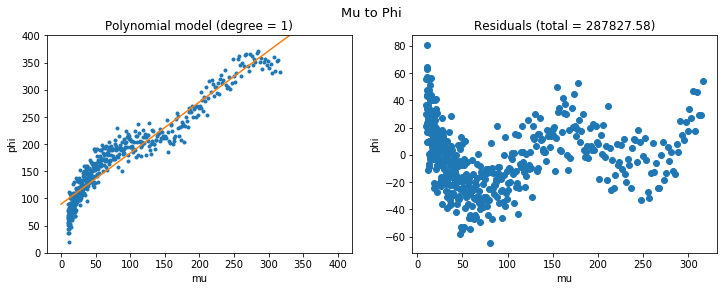

In [82]:
# mu to phi

fig, ax = plt.subplots(1,2,figsize=(12,4))

x = mu_to_phi[:,0]
y = mu_to_phi[:,1]

# polynomial fit
deg = 1
z = np.polyfit(x, y, deg, full=True)
p = np.poly1d(z[0]) # object given the parameters of the poly fit
xp = np.linspace(0, 400, 400)
ax[0].plot(x, y, '.', xp, p(xp), '-')
ax[0].set_title(f'Polynomial model (degree = {deg})')
ax[0].set_xlabel('mu')
ax[0].set_ylabel('phi')
ax[0].set_ylim(0, 400)

# residuals
residuals = np.polyval(p, x) - y
# np.sum((np.polyval(parameters, x) - y)**2)
res = z[1][0]
ax[1].scatter(x, residuals)
ax[1].set_title(f'Residuals (total = {res:0.8})')
ax[1].set_xlabel('mu')
ax[1].set_ylabel('phi')

fig.suptitle('Mu to Phi', fontsize=13)
plt.show()